<a href="https://colab.research.google.com/github/mathewfedrick/Python-Induction-Programme/blob/main/Tom%26Jerry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv("Train.csv")

In [ ]:
col = list(df.columns)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for m in col:
  df[m]=labelencoder.fit_transform(df[m])
df

,Frame_ID,Emotion
0,0,2
1,1,2
2,112,4
3,221,4
4,232,1
...,...,...
293,216,0
294,217,0
295,218,0
296,219,0


In [ ]:
df.head()

,Frame_ID,Emotion
0,0,2
1,1,2
2,112,4
3,221,4
4,232,1


In [ ]:
df.tail()

,Frame_ID,Emotion
293,216,0
294,217,0
295,218,0
296,219,0
297,220,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Frame_ID  298 non-null    int64
 1   Emotion   298 non-null    int64
dtypes: int64(2)
memory usage: 4.8 KB


In [ ]:
df.shape

(298, 2)

In [ ]:
df.describe()

,Frame_ID,Emotion
count,298.000000,298.000000
mean,148.483221,1.687919
std,86.140876,1.624700
min,0.000000,0.000000
25%,74.250000,0.000000
50%,148.500000,1.000000
75%,222.750000,3.000000
max,296.000000,4.000000


In [ ]:
df.nunique()

Frame_ID    297
Emotion       5
dtype: int64

In [ ]:
df.isnull().sum()

Frame_ID    0
Emotion     0
dtype: int64

In [ ]:
df.isnull()

,Frame_ID,Emotion
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
293,False,False
294,False,False
295,False,False
296,False,False


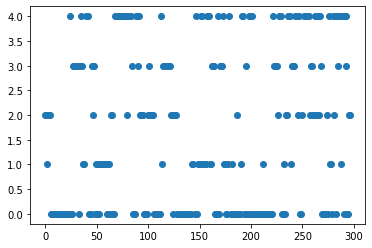

In [ ]:
plt.scatter(df.Frame_ID,df.Emotion)
plt.show()

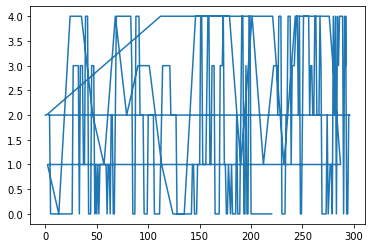

In [ ]:
plt.plot(df.Frame_ID,df.Emotion)
plt.show()

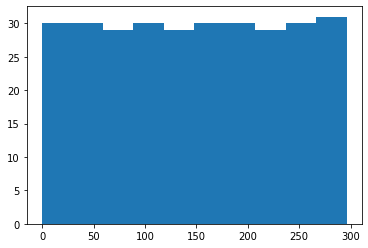

In [ ]:
plt.hist(df.Frame_ID)
plt.show()

In [ ]:
x=df.drop('Emotion',axis=1)
y=df['Emotion']

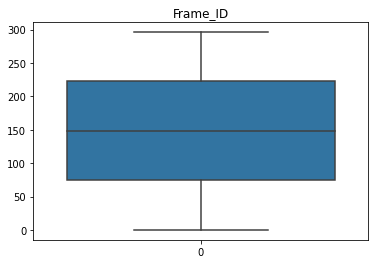

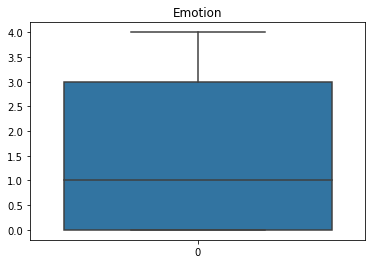

In [ ]:
for j in col:
  sns.boxplot(df[j])
  plt.title(j)
  plt.show()

In [ ]:
x.head(3)

,Frame_ID
0,0
1,1
2,112


In [ ]:
y.head(3)

0    2
1    2
2    4
Name: Emotion, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=0)


In [ ]:
a=StandardScaler()
x_train=a.fit_transform(x_train)
x_test=a.transform(x_test)

In [ ]:
clf=DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[43,  5,  5,  5,  6],
       [ 6,  9,  0,  1,  1],
       [ 2,  0,  6,  2,  4],
       [ 1,  0,  3, 12,  1],
       [ 4,  7,  3,  5, 18]])

In [ ]:
import sklearn

In [ ]:
from sklearn.metrics import accuracy_score
sklearn.metrics.accuracy_score(y_test,y_pred)

0.5906040268456376

In [ ]:
import graphviz

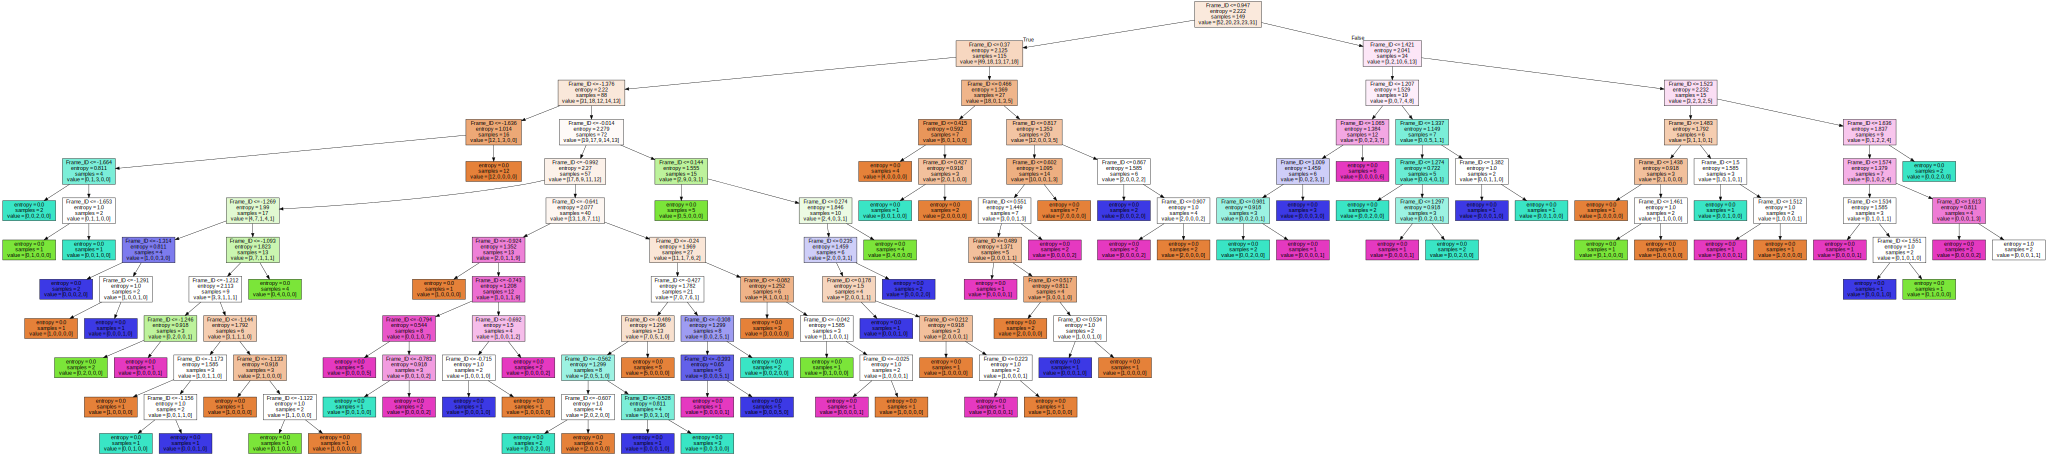

In [ ]:
graphviz.Source(export_graphviz(clf,feature_names=x.columns,filled=True,))